# Новый анализ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests
import pingouin as pg

In [2]:
!pip install pingouin pandas==1.5.3 numpy==1.21.5

In [3]:
import pandas as pd

# Загрузка данных
data_path = './data/clean_data.csv'
data = pd.read_csv(data_path)

In [4]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных для PCA и t-SNE
features = data.iloc[:, 1:]  # Предполагая, что ответы на вопросы начинаются с 3 колонки
# print(features.head())
features_scaled = StandardScaler().fit_transform(features.fillna(0))

In [5]:
from sklearn.metrics import silhouette_score

# Определение значений силуэта для разного числа кластеров
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=420, n_init=100)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    print(f"Для n_clusters = {n_clusters} средний silhouette score равен: {silhouette_avg}")

Для n_clusters = 2 средний silhouette score равен: 0.1427104462816802
Для n_clusters = 3 средний silhouette score равен: 0.14146016361393707
Для n_clusters = 4 средний silhouette score равен: 0.0987760817240395
Для n_clusters = 5 средний silhouette score равен: 0.07894110857722748


In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение оптимального числа кластеров
optimal_clusters = 3  # из предыдущего анализа
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(features_scaled)

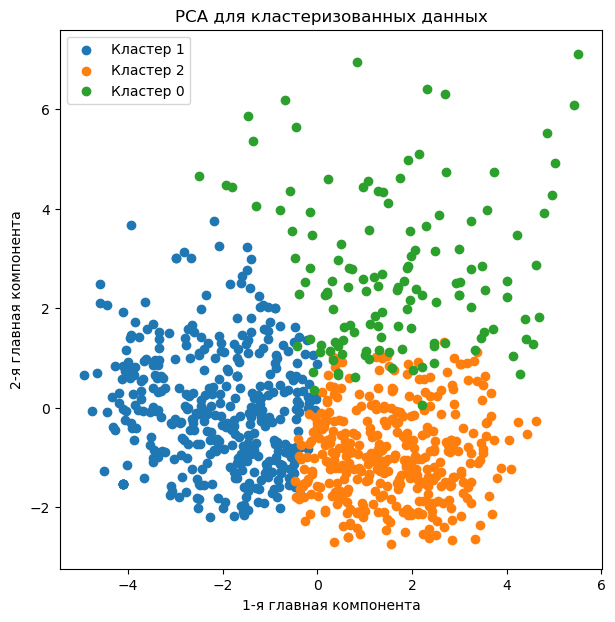

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Определение уникальных кластеров
clusters = data['Cluster'].unique()
colors = plt.cm.get_cmap('autumn', len(clusters))

# Визуализация PCA 
plt.figure(figsize=(7, 7))

for i, cluster in enumerate(clusters):
    cluster_points = principalComponents[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')

plt.title('PCA для кластеризованных данных')
plt.xlabel('1-я главная компонента')
plt.ylabel('2-я главная компонента')
plt.legend()
plt.show()

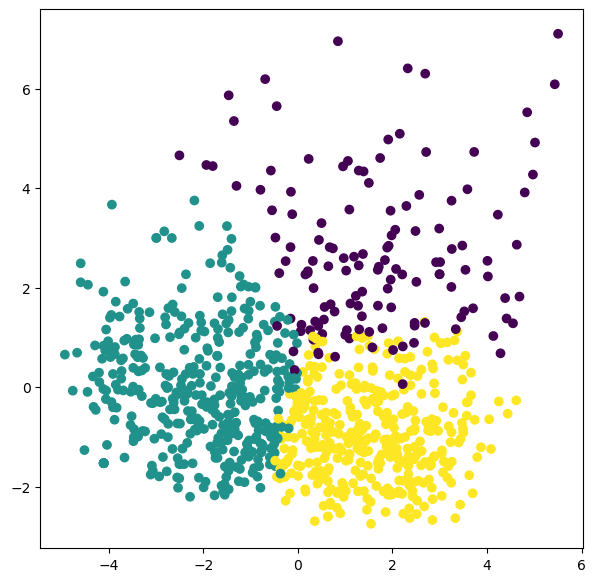

In [8]:
# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Визуализация PCA 
plt.figure(figsize=(7, 7))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster'])

#plt.title('PCA кластеры')
#plt.legend('1 кластер', '2 кластер', '3 кластер')
plt.show()

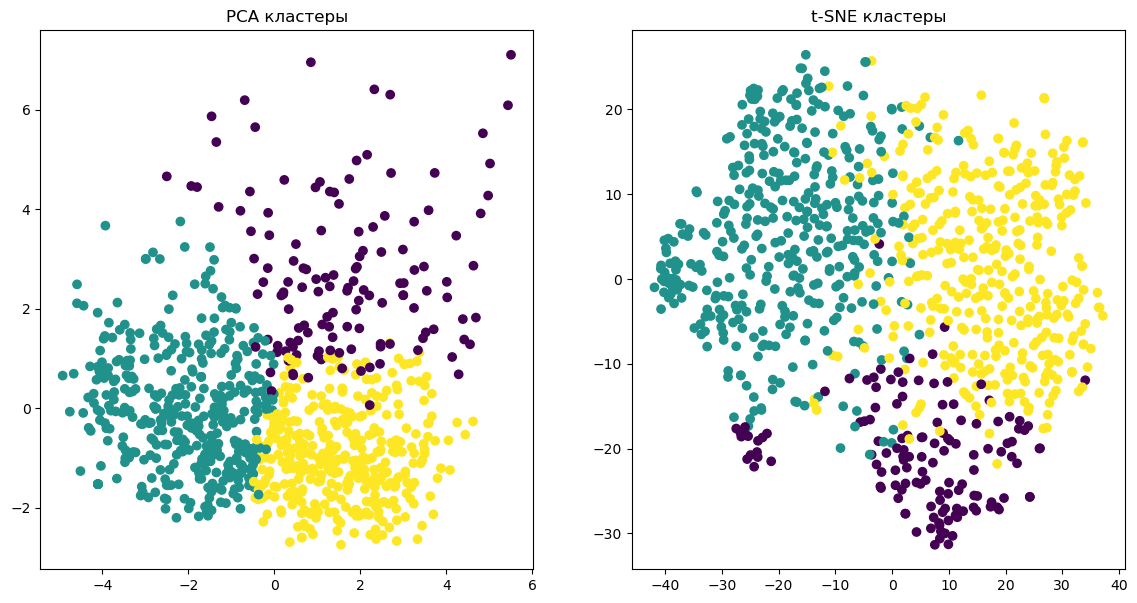

In [9]:
# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=342)
tsne_results = tsne.fit_transform(features_scaled)

# Визуализация PCA и t-SNE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster'])
plt.title('PCA кластеры')
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster'])
plt.title('t-SNE кластеры')
plt.show()

Попробуем и другие кластеризации на всякий:

In [10]:
# Определение числа кластеров
optimal_clusters = 2

# K-means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)

# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
agglo_labels = agglo.fit_predict(features_scaled)
agglo_silhouette = silhouette_score(features_scaled, agglo_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
# Для DBSCAN может быть случай, когда все точки будут считаться шумом (если все метки -1)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Недопустимое значение силуэта, если только один кластер или все выбросы

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(features_scaled)
gmm_silhouette = silhouette_score(features_scaled, gmm_labels)

# Сравнение силуэтных оценок
print(f"K-means silhouette score: {kmeans_silhouette}")
print(f"Hierarchical Clustering silhouette score: {agglo_silhouette}")
print(f"DBSCAN silhouette score: {dbscan_silhouette}")
print(f"Gaussian Mixture Model silhouette score: {gmm_silhouette}")

# Добавление меток кластеров в DataFrame
data['Cluster_KMeans'] = kmeans_labels
data['Cluster_Agglo'] = agglo_labels
data['Cluster_DBSCAN'] = dbscan_labels
data['Cluster_GMM'] = gmm_labels

K-means silhouette score: 0.1427114224527142
Hierarchical Clustering silhouette score: 0.11558234466248993
DBSCAN silhouette score: 0.06839550637235968
Gaussian Mixture Model silhouette score: 0.09187746496941748


/Users/alexander/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


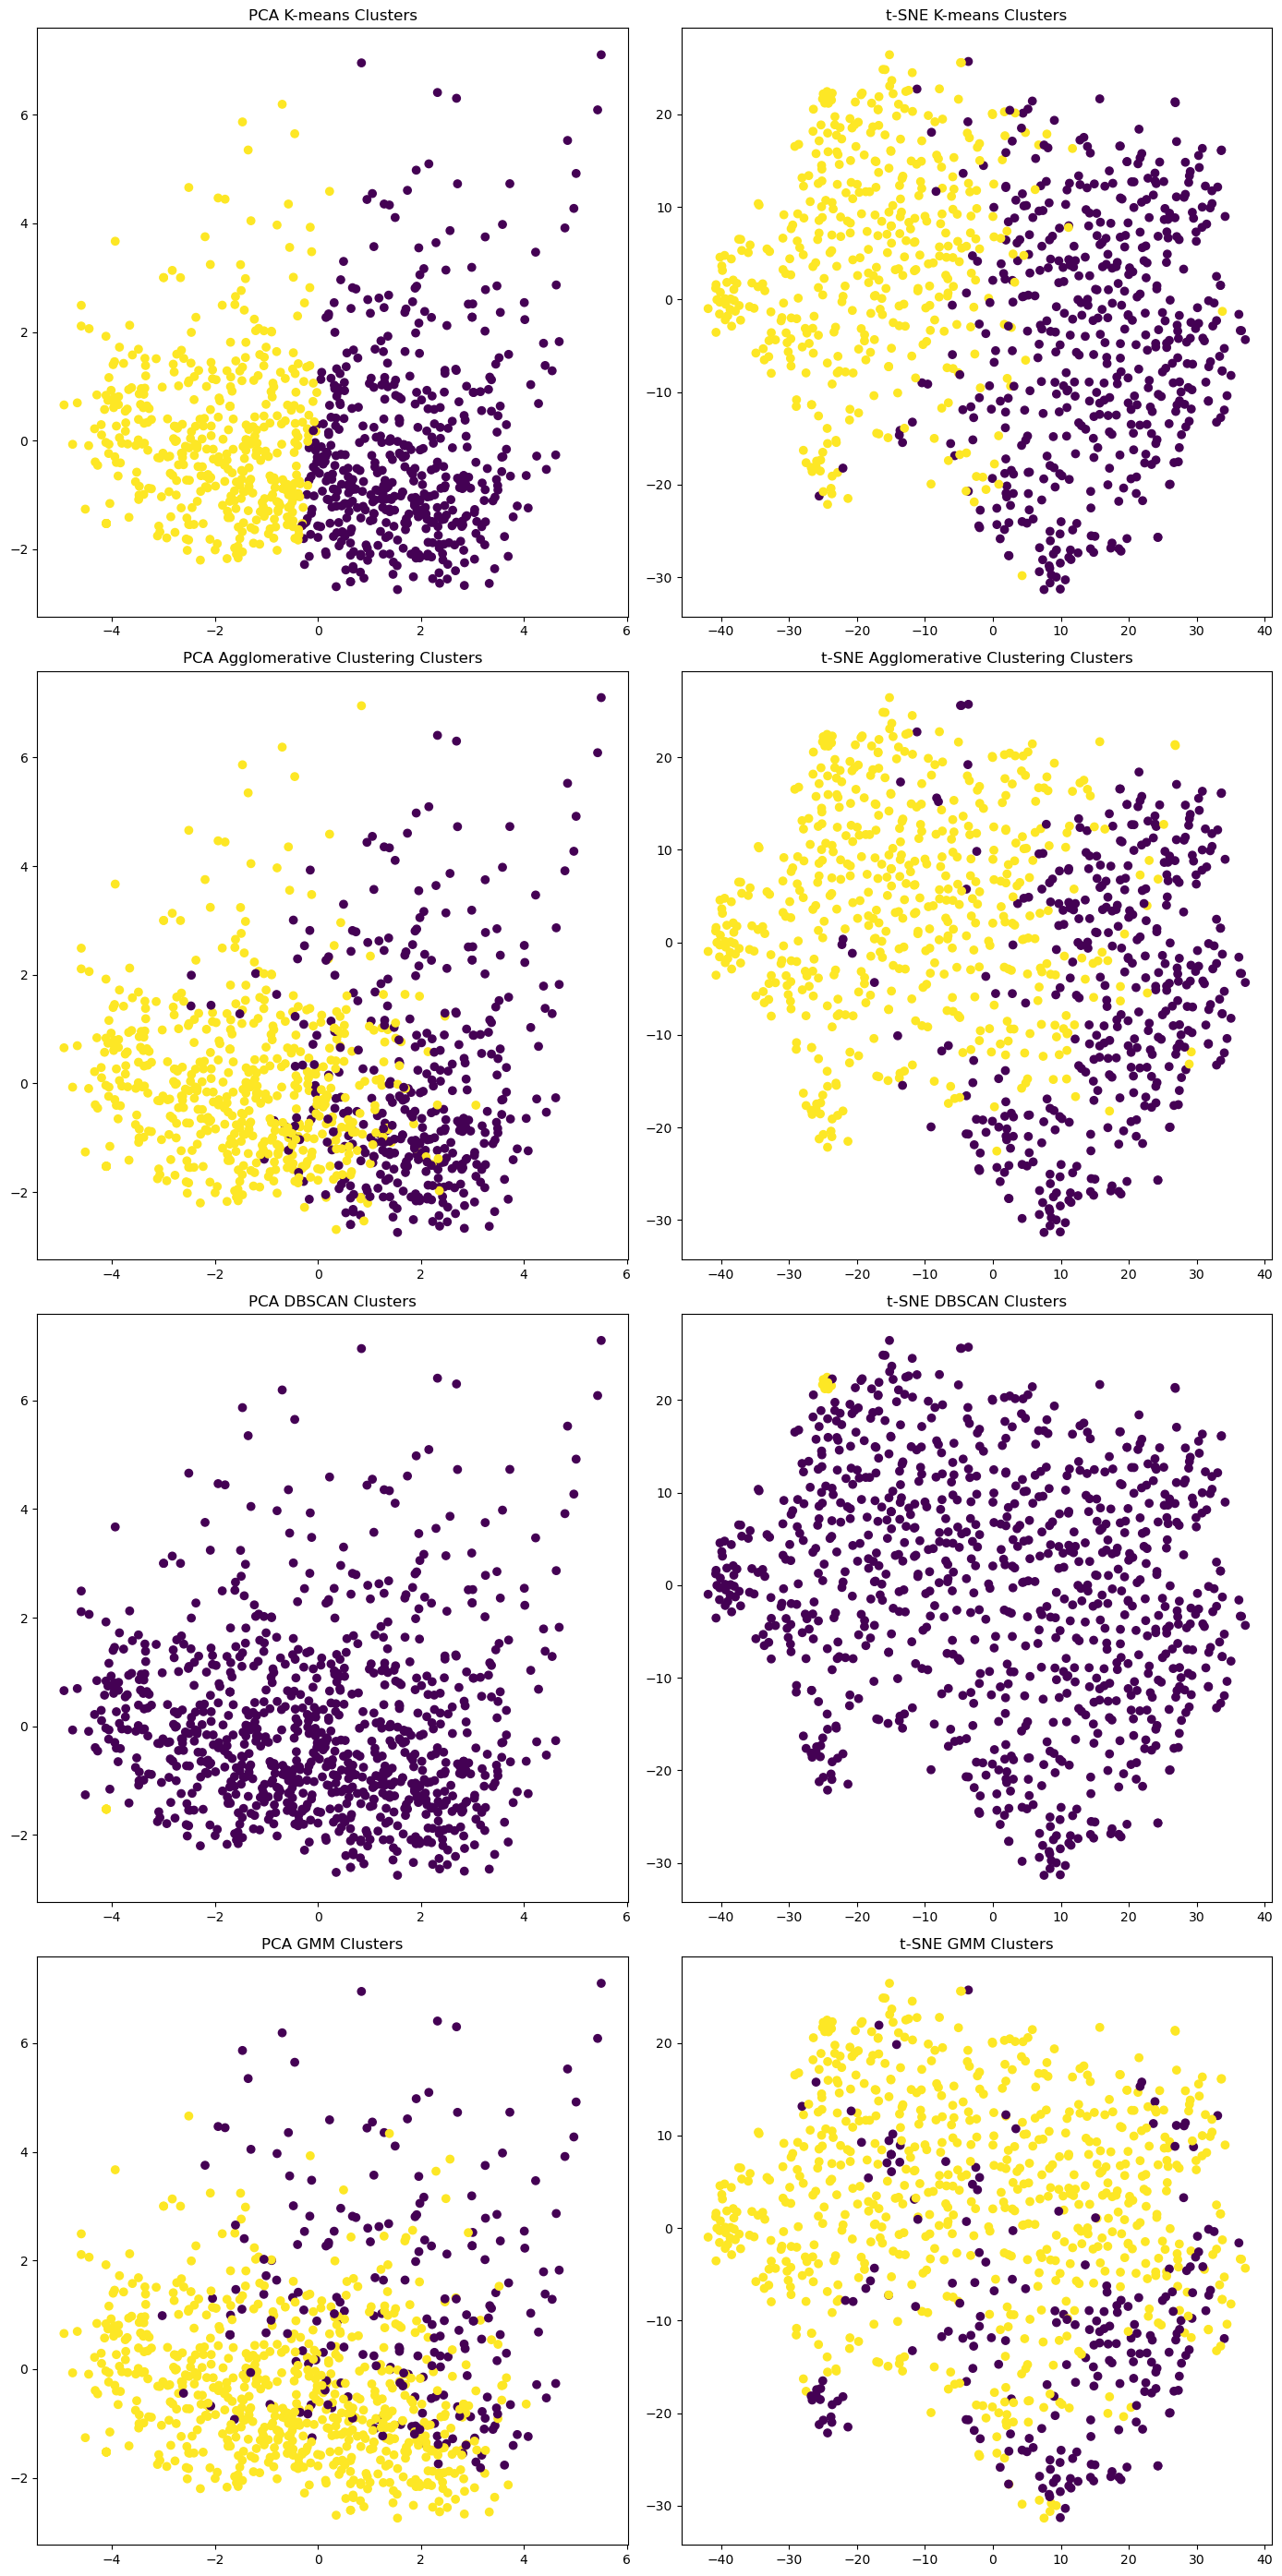

In [11]:
# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=342)
tsne_results = tsne.fit_transform(features_scaled)

# Визуализация PCA и t-SNE
plt.figure(figsize=(14, 28))

plt.subplot(4, 2, 1)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster_KMeans'])
plt.title('PCA K-means Clusters')

plt.subplot(4, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster_KMeans'])
plt.title('t-SNE K-means Clusters')

plt.subplot(4, 2, 3)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster_Agglo'])
plt.title('PCA Agglomerative Clustering Clusters')

plt.subplot(4, 2, 4)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster_Agglo'])
plt.title('t-SNE Agglomerative Clustering Clusters')

plt.subplot(4, 2, 5)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster_DBSCAN'])
plt.title('PCA DBSCAN Clusters')

plt.subplot(4, 2, 6)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster_DBSCAN'])
plt.title('t-SNE DBSCAN Clusters')

plt.subplot(4, 2, 7)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster_GMM'])
plt.title('PCA GMM Clusters')

plt.subplot(4, 2, 8)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster_GMM'])
plt.title('t-SNE GMM Clusters')

plt.tight_layout()
plt.show()

In [12]:
# Создание таблицы с разбивкой респондентов по кластерам
cluster_distribution = data.groupby(['Специальность', 'Cluster']).size().unstack(fill_value=0)
print(cluster_distribution)


Cluster                                        0   1   2
Специальность                                           
Акушерство-гинекология                         3  30   9
Аллергология-иммунология                       0   2   5
Анестезиология-реаниматология                  1  30   0
Гастроэнтерология                              0   2   5
Гематология                                    0   2   0
Генетика                                       1   0   0
Гериатрия                                      0   1   6
Дерматовенерология                             6  11  12
Детская кардиология                            0   1   4
Детская онкология (химиотерапия)               0   1   1
Детская урология-андрология                    0   0   1
Детская хирургия                               0   6   1
Детская эндокринология                         0   0   5
Инфекционные болезни                           4  11  10
Кардиология                                    0   1   5
Клиническая лабораторная диагно

In [13]:
print(data.columns)

Index(['Специальность',
       ' 1. Врач должен регулярно тесно общаться с пациентами',
       ' 2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты',
       ' 3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию',
       ' 4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя',
       ' 5. Врач регулярно взаимодействует с кровью, гноем, внутренними органами, тяжелыми травмами и другими вещами, которые сильно действуют на впечатлительных людей',
       ' 6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы',
       ' 7. Врач часто сталкивается со смертью, неизлечимыми больными и пациентами в тяжелом состоянии',
       ' 8. Врач проводит большую часть дня сидя на одном месте',
       ' 9. Врач должен быстро принимать решения и не теряться в критических ситуациях',
       ' 10. Вр

In [14]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Пересчет значений p и скорректированных значений p для каждого вопроса
results = []

question_columns = [
    ' 1. Врач должен регулярно тесно общаться с пациентами',
    ' 2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты',
    ' 3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию',
    ' 4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя',
    ' 5. Врач регулярно взаимодействует с кровью, гноем, внутренними органами, тяжелыми травмами и другими вещами, которые сильно действуют на впечатлительных людей',
    ' 6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы',
    ' 7. Врач часто сталкивается со смертью, неизлечимыми больными и пациентами в тяжелом состоянии',
    ' 8. Врач проводит большую часть дня сидя на одном месте',
    ' 9. Врач должен быстро принимать решения и не теряться в критических ситуациях',
    ' 10. Врач помогает другому специалисту в постановке диагноза или проведении процедур, но сам не является лечащим',
    ' 11. Врач часто работает в команде',
    ' 12. Врач ведет одного и того же пациента длительное время: примерно год и более',
    ' 13. Врач должен долгое время проводить стоя',
    ' 14. Врач является узким специалистом в определенной сфере',
    ' 15. Врач имеет специальность широкого профиля и регулярно обращается к знаниям из смежных областей. Например, терапевт и гастроэнтеролог',
    ' 16. У врача этой специальности более высокий риск заразиться от пациента',
    ' 17. Врач проводит в среднем больше времени за бумажной работой, чем коллеги из других сфер',
    ' 18. Врач напрямую отвечает за состояние больного, то есть является лечащим',
    ' 19. Врач регулярно получает обратную связь и признание от пациентов',
    ' 20. Врач работает по предсказуемому и постоянному графику',
    ' 21. В сообществе врачей многие считают, что эта специальность в большей степени подходит мужчинам',
    ' 22. Работа предполагает ночные регулярные ночные или суточные смены'
]

for col in question_columns:
    groups = [group[col].dropna() for name, group in data.groupby('Cluster')]
    stat, p_value = kruskal(*groups)
    results.append((col, p_value))

p_values = [result[1] for result in results]
_, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

significant_results = {result[0]: {'p_value': result[1], 'corrected_p_value': corr_p} 
                       for result, corr_p in zip(results, corrected_p_values) if corr_p < 0.05}

print("Значительные различия между кластерами (скорректированные p-values):\n")
for question, pvals in significant_results.items():
    print(f"{question}: p-value = {pvals['p_value']:.3e}, corrected p-value = {pvals['corrected_p_value']:.3e}")

Значительные различия между кластерами (скорректированные p-values):

 1. Врач должен регулярно тесно общаться с пациентами: p-value = 4.761e-34, corrected p-value = 1.047e-32
 2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты: p-value = 1.194e-46, corrected p-value = 2.627e-45
 3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию: p-value = 2.214e-78, corrected p-value = 4.871e-77
 4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя: p-value = 3.280e-66, corrected p-value = 7.216e-65
 5. Врач регулярно взаимодействует с кровью, гноем, внутренними органами, тяжелыми травмами и другими вещами, которые сильно действуют на впечатлительных людей: p-value = 4.645e-102, corrected p-value = 1.022e-100
 6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы: p-value = 1.442e-101, corr

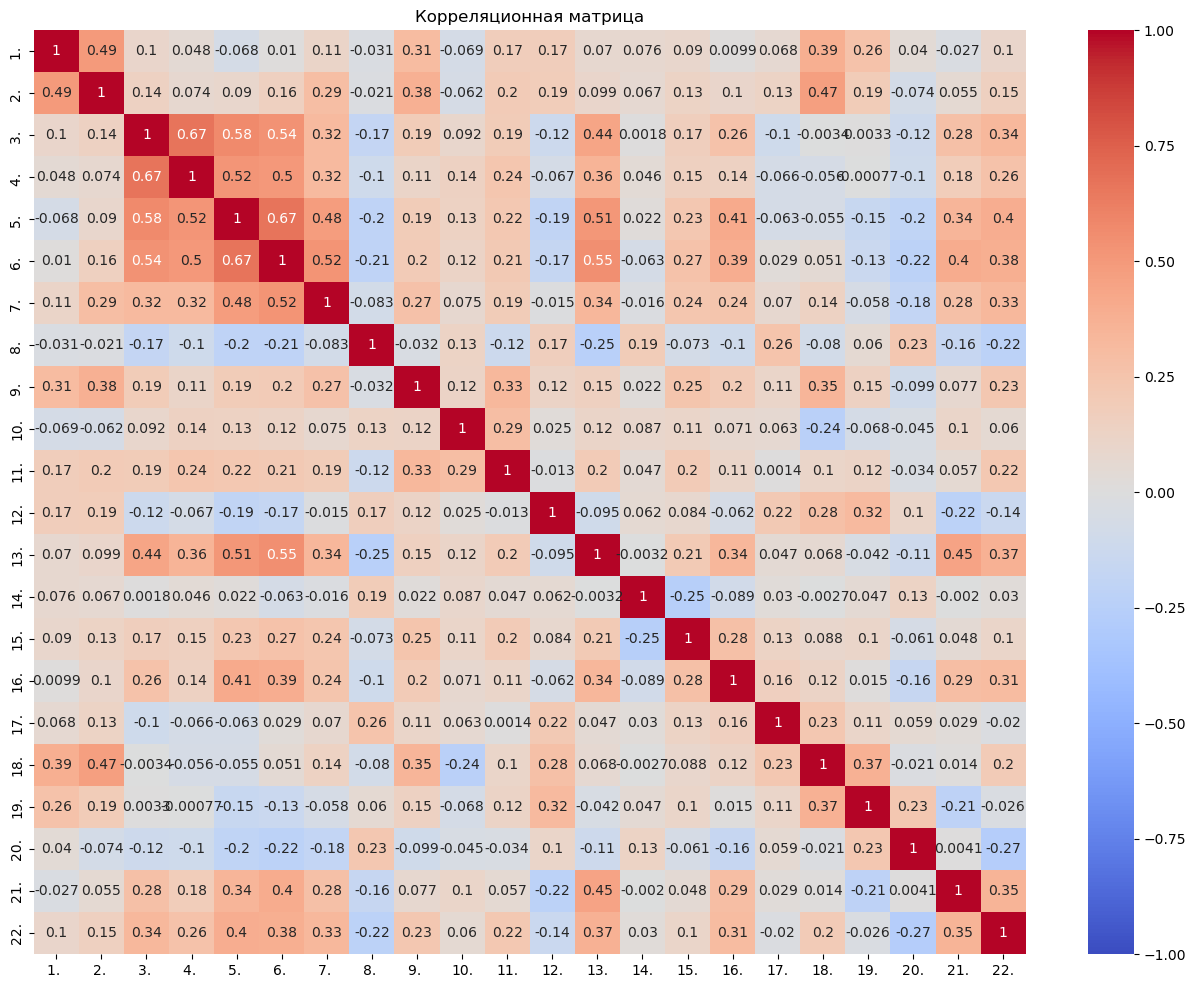

Пары вопросов с самой сильной корреляцией:
 4.   6.     0.501304
13.  5.     0.508220
4.   5.     0.519619
6.   7.     0.524077
3.   6.     0.536213
6.   13.    0.549475
5.   3.     0.578057
3.   4.     0.665772
5.   6.     0.669600
dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционный анализ
features = data[question_columns]
correlation_matrix = features.corr()

short_column_names = {col: col.strip()[:3] for col in question_columns}
correlation_matrix = correlation_matrix.rename(columns=short_column_names, index=short_column_names)

# Построение корреляционной матрицы
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

# Найдем пары вопросов с самой сильной корреляцией
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
strong_corr_pairs = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1.0)]
print("Пары вопросов с самой сильной корреляцией:\n", strong_corr_pairs)

In [16]:
# Поиск наиболее и наименее нагруженных вопросов
correlation_sums = correlation_matrix.abs().sum().sort_values(ascending=False)
most_loaded_questions = correlation_sums.head(5)
least_loaded_questions = correlation_sums.tail(5)

print("Наиболее нагруженные вопросы:\n", most_loaded_questions)
print("Наименее нагруженные вопросы:\n", least_loaded_questions)

Наиболее нагруженные вопросы:
 6.     6.802068
5.     6.731501
3.     5.824945
13.    5.812300
7.     5.566458
dtype: float64
Наименее нагруженные вопросы:
 19.    3.660170
20.    3.488180
10.    3.227415
17.    2.987626
14.    2.285026
dtype: float64


In [17]:
import numpy as np
import pandas as pd

def cronbach_alpha(df):
    df = df.dropna(axis=1, how='any')
    n_items = df.shape[1]
    variances_sum = df.var(axis=0, ddof=1).sum()
    total_variance = df.sum(axis=1).var(ddof=1)
    alpha = (n_items / (n_items - 1)) * (1 - (variances_sum / total_variance))
    return alpha

# Расчет коэффициента альфа Кронбаха для всех вопросов
cronbach_alpha_all = cronbach_alpha(features)
print(f"Коэффициент альфа Кронбаха для всех вопросов: {cronbach_alpha_all:.3f}")

# Функция для расчета альфа Кронбаха без одного вопроса
def cronbach_alpha_without_question(df, question):
    df_without_question = df.drop(columns=[question])
    return cronbach_alpha(df_without_question)

# Найдем "слабые" вопросы, удаление которых увеличивает альфа Кронбаха
weak_questions = []
for question in features.columns:
    alpha_without = cronbach_alpha_without_question(features, question)
    if alpha_without > cronbach_alpha_all:
        weak_questions.append((question, alpha_without))

weak_questions.sort(key=lambda x: x[1], reverse=True)
print("Слабые вопросы, удаление которых увеличивает альфа Кронбаха:\n", weak_questions)

Коэффициент альфа Кронбаха для всех вопросов: 0.730
Слабые вопросы, удаление которых увеличивает альфа Кронбаха:
 [(' 8. Врач проводит большую часть дня сидя на одном месте', 0.7503593231686382), (' 20. Врач работает по предсказуемому и постоянному графику', 0.750284135403536), (' 12. Врач ведет одного и того же пациента длительное время: примерно год и более', 0.7401064675678695), (' 14. Врач является узким специалистом в определенной сфере', 0.7388053693159845), (' 19. Врач регулярно получает обратную связь и признание от пациентов', 0.7328262081183373), (' 10. Врач помогает другому специалисту в постановке диагноза или проведении процедур, но сам не является лечащим', 0.7320094660338784)]


In [18]:
question_columns = [
    ' 1. Врач должен регулярно тесно общаться с пациентами',
    ' 2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты',
    ' 3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию',
    ' 4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя',
    ' 5. Врач регулярно взаимодействует с кровью, гноем, внутренними органами, тяжелыми травмами и другими вещами, которые сильно действуют на впечатлительных людей',
    ' 6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы',
    ' 7. Врач часто сталкивается со смертью, неизлечимыми больными и пациентами в тяжелом состоянии',
    ' 8. Врач проводит большую часть дня сидя на одном месте',
    ' 9. Врач должен быстро принимать решения и не теряться в критических ситуациях',
    ' 10. Врач помогает другому специалисту в постановке диагноза или проведении процедур, но сам не является лечащим',
    ' 11. Врач часто работает в команде',
    ' 12. Врач ведет одного и того же пациента длительное время: примерно год и более',
    ' 13. Врач должен долгое время проводить стоя',
    ' 14. Врач является узким специалистом в определенной сфере',
    ' 15. Врач имеет специальность широкого профиля и регулярно обращается к знаниям из смежных областей. Например, терапевт и гастроэнтеролог',
    ' 16. У врача этой специальности более высокий риск заразиться от пациента',
    ' 17. Врач проводит в среднем больше времени за бумажной работой, чем коллеги из других сфер',
    ' 18. Врач напрямую отвечает за состояние больного, то есть является лечащим',
    ' 19. Врач регулярно получает обратную связь и признание от пациентов',
    ' 20. Врач работает по предсказуемому и постоянному графику',
    ' 21. В сообществе врачей многие считают, что эта специальность в большей степени подходит мужчинам',
    ' 22. Работа предполагает ночные регулярные ночные или суточные смены'
]

table_data = {
    '№ вопроса': list(range(1, len(question_columns) + 1)),
    'Значение p': p_values,
    'Скорректированное значение p': corrected_p_values,
    'Кластер 0': [data[data['Cluster'] == 0][col].describe().to_dict() for col in question_columns],
    'Кластер 1': [data[data['Cluster'] == 1][col].describe().to_dict() for col in question_columns],
    'Кластер 2': [data[data['Cluster'] == 2][col].describe().to_dict() for col in question_columns],
}

table_df = pd.DataFrame(table_data)
print(table_df)
table_df.to_csv('final_table.csv')

    № вопроса     Значение p  Скорректированное значение p  \
0           1   4.760889e-34                  1.047396e-32   
1           2   1.194229e-46                  2.627304e-45   
2           3   2.214299e-78                  4.871459e-77   
3           4   3.280071e-66                  7.216156e-65   
4           5  4.645333e-102                 1.021973e-100   
5           6  1.441603e-101                 3.171527e-100   
6           7   7.633894e-59                  1.679457e-57   
7           8   4.666805e-12                  1.026697e-10   
8           9   5.001633e-43                  1.100359e-41   
9          10   1.243750e-10                  2.736249e-09   
10         11   3.876887e-18                  8.529151e-17   
11         12   1.753422e-18                  3.857528e-17   
12         13   2.796822e-62                  6.153008e-61   
13         14   9.422578e-01                  1.000000e+00   
14         15   4.193552e-15                  9.225815e-14   
15      

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


results = []

for col in question_columns:
    groups = [group[col].dropna() for name, group in data.groupby('Cluster')]
    stat, p_value = kruskal(*groups)
    results.append((col, p_value))

p_values = [result[1] for result in results]
_, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

# Проверка объемов выборок
cluster_sizes = data['Cluster'].value_counts()

print("Размеры кластеров:\n", cluster_sizes)
print("Оригинальные p-значения:\n", p_values)
print("Скорректированные p-значения:\n", corrected_p_values)

# Пример анализа величины эффекта для одного из вопросов
import pingouin as pg

# Выбор вопроса для анализа
question = ' 1. Врач должен регулярно тесно общаться с пациентами'
effect_size = pg.compute_effsize(data, paired=False, eftype='cohen')

print("Величина эффекта для вопроса '1. Врач должен регулярно тесно общаться с пациентами':", effect_size)

Размеры кластеров:
 1    394
2    382
0    133
Name: Cluster, dtype: int64
Оригинальные p-значения:
 [4.760889365029157e-34, 1.1942292636079569e-46, 2.214299342763642e-78, 3.280070768733923e-66, 4.6453331054590796e-102, 1.4416029837614494e-101, 7.633893690377039e-59, 4.666804759643127e-12, 5.0016329296786696e-43, 1.243749709491807e-10, 3.8768869304802144e-18, 1.753421652251613e-18, 2.796821806660675e-62, 0.9422578242142976, 4.19355207252923e-15, 3.3054242817737038e-34, 2.4846799018941267e-12, 1.844903428754982e-69, 1.214196779123936e-21, 1.3503162720499322e-13, 7.812488426703317e-29, 5.09872232820821e-49]
Скорректированные p-значения:
 [1.04739566e-032 2.62730438e-045 4.87145855e-077 7.21615569e-065
 1.02197328e-100 3.17152656e-100 1.67945661e-057 1.02669705e-010
 1.10035924e-041 2.73624936e-009 8.52915125e-017 3.85752763e-017
 6.15300797e-061 1.00000000e+000 9.22581456e-014 7.27193342e-033
 5.46629578e-011 4.05878754e-068 2.67123291e-020 2.97069580e-012
 1.71874745e-027 1.12171891e-04

TypeError: compute_effsize() missing 1 required positional argument: 'y'

In [21]:

# Величина эффекта для каждого вопроса
effect_sizes = []

for col in question_columns:
    clusters = data['Cluster'].unique()
    group_0 = data[data['Cluster'] == clusters[0]][col].dropna()
    group_1 = data[data['Cluster'] == clusters[1]][col].dropna()
    group_2 = data[data['Cluster'] == clusters[2]][col].dropna()
    
    # Рассчитываем величину эффекта (Cohen's d) для каждой пары кластеров
    effect_size_01 = pg.compute_effsize(group_0, group_1, eftype='cohen')
    effect_size_02 = pg.compute_effsize(group_0, group_2, eftype='cohen')
    effect_size_12 = pg.compute_effsize(group_1, group_2, eftype='cohen')
    
    effect_sizes.append({
        'question': col,
        'effect_size_01': effect_size_01,
        'effect_size_02': effect_size_02,
        'effect_size_12': effect_size_12
    })

# Печать величин эффектов
for effect in effect_sizes:
    print(f"Вопрос: {effect['question']}")
    print(f"Величина эффекта (Кластер 0 и Кластер 1): {effect['effect_size_01']:.2f}")
    print(f"Величина эффекта (Кластер 0 и Кластер 2): {effect['effect_size_02']:.2f}")
    print(f"Величина эффекта (Кластер 1 и Кластер 2): {effect['effect_size_12']:.2f}")
    print("-" * 40)

# Создание итоговой таблицы
table_data = {
    '№ вопроса': list(range(1, len(question_columns) + 1)),
    'Значение p': p_values,
    'Скорректированное значение p': corrected_p_values,
    'Кластер 0': [data[data['Cluster'] == 0][col].describe().to_dict() for col in question_columns],
    'Кластер 1': [data[data['Cluster'] == 1][col].describe().to_dict() for col in question_columns],
    'Кластер 2': [data[data['Cluster'] == 2][col].describe().to_dict() for col in question_columns],
}

table_df = pd.DataFrame(table_data)
print(table_df)

import ace_tools as tools; tools.display_dataframe_to_user(name="Results Table", dataframe=table_df)

Вопрос:  1. Врач должен регулярно тесно общаться с пациентами
Величина эффекта (Кластер 0 и Кластер 1): -0.13
Величина эффекта (Кластер 0 и Кластер 2): 1.31
Величина эффекта (Кластер 1 и Кластер 2): 1.47
----------------------------------------
Вопрос:  2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты
Величина эффекта (Кластер 0 и Кластер 1): 0.10
Величина эффекта (Кластер 0 и Кластер 2): 1.91
Величина эффекта (Кластер 1 и Кластер 2): 1.75
----------------------------------------
Вопрос:  3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию
Величина эффекта (Кластер 0 и Кластер 1): 1.87
Величина эффекта (Кластер 0 и Кластер 2): 0.97
Величина эффекта (Кластер 1 и Кластер 2): -0.68
----------------------------------------
Вопрос:  4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя
Величина эффекта (Кластер 0 и Кластер 1): 1.59
Величина э

ModuleNotFoundError: No module named 'ace_tools'

In [25]:
import pandas as pd

# Загрузка CSV файла
file_path = 'final_table.csv'
data = pd.read_csv(file_path)

# Функция для форматирования описательных статистик
def format_statistics(desc):
    formatted = (
        f"Среднее: {desc['mean']:.2f}, "
        f"Медиана: {desc['50%']:.2f}, "
        f"Межквартильный размах: ({desc['25%']:.2f}, {desc['75%']:.2f}), "
        f"Min: {desc['min']:.2f}, "
        f"Max: {desc['max']:.2f}"
    )
    return formatted

# Преобразование характеристик кластеров в человекочитаемый формат
data['Кластер 0'] = data['Кластер 0'].apply(eval).apply(format_statistics)
data['Кластер 1'] = data['Кластер 1'].apply(eval).apply(format_statistics)
data['Кластер 2'] = data['Кластер 2'].apply(eval).apply(format_statistics)

# Сохранение обновленной таблицы
updated_file_path = 'updated_final_table.csv'
data.to_csv(updated_file_path, index=False)

# Отображение обновленной таблицы пользователю
#import ace_tools as tools; tools.display_dataframe_to_user(name="Updated Final Table", dataframe=data)

In [ ]:
Анализ результатов

	1.	Величина эффекта (Cohen’s d): Это значение показывает, насколько велико различие между группами. Обычно:
	•	0.2 – малый эффект
	•	0.5 – средний эффект
	•	0.8 и выше – большой эффект
	2.	Реалистичность p-значений: Если величины эффектов соответствуют малым p-значениям, то результаты более правдоподобны. Если же величины эффектов малы, а p-значения крайне малы, то это может указывать на проблемы в данных или методах анализа.